# Multiple Linear Regression

Today we are going to explore Multiple Linear Regression (MLR). MLR is probably one of the best know, but also the most useful machine learning algorithms which can be applied to a host of data sets. It does a good job of balance both the descriptive characteristics of the data set with predictive performance. 

Let's get started!

In [78]:
#Import the necessary packages. We'll be using all of these, and more to come
import os
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [79]:
#We're going to be working with the famous "Boston Housing" data set which can be found in the 'sklearn' package
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target

#### Loading our dataset

First let's load the data set and add the feature names as our columns'

In [80]:
df = pd.DataFrame(x, columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### MLR Assumptions

#### In MLR, there are five main assumptions that we want to check prior to using our model to make predictions on a data set. 

1. Does the dependant variable exhibit a **linear relationship** with the independant variables?

2. Do the independant variables demonstrate **multi-collinearity** amongst themselves?

3. Are the **residuals** of the regression **normally distributed**?

4. Do the residuals have **constant variance**?

5. Are the **residuals independant** of each other?

As we walk through this tutorial we'll examine each of these assumptions, and arrive at the best possible fitting model!

### Exploratory Data Analysis

Now that the data is loaded, let's do some Exploratory Data Analysis (EDA) on our data set to see what kinds of variables we have,  and perhaps remove a few based on missingness, distribution, or multi-collinearity

In [81]:
print(df.shape, "\n")
print(df.columns, "\n")
print(df.dtypes)

(506, 13) 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object') 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


### Missingness

#### There are three types of missingness to be considered: 

**Missing Completely At Random (MCAR)**: This means that a value is missing due to random chance (an entry on a survey was smudged and was unable to be entered)

**Missing At Random (MAR)**: MAR-type missingness is when a variable is missing, but it's due to a relationship with another variable in the data set (i.e. a homeowners survey reveals that a large number of people failed to answer the survey - but this may be due to that subset of people working later than 6pm when the surveys were collected).

**Missing Not At Random (MNAR)**: This missingness is the most dangerous to encounter, and must be handled carefully. This occurs when a value is missing for an explicit reason - than missingness has meaning.

To examine the missingness for each variable in this data set is left as an exercise to the reader. For today we will assume that all missingness is MCAR (a very bad assumption, but it will enable us to move through the lesson). Please take a look and examine these variables yourself!

Since we are assigning integers for the categories in each column, the 'NA' values are assigned an integer, hence we won't need to impute missing values. With more time assigned to data understanding, we may decide that eliminating or mean/median-imputing would be a better method of handling missing values, but for today we'll leave missing categorical variables as their own  category and use them in our regression this way.

In [82]:
#To check if we have any missing values, we'll run this code
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Linearity of the data

Let's first plot each variable against to see what the distributions look like

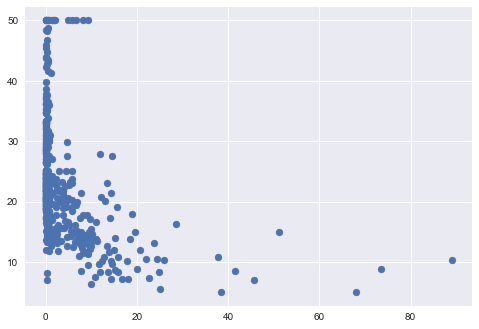

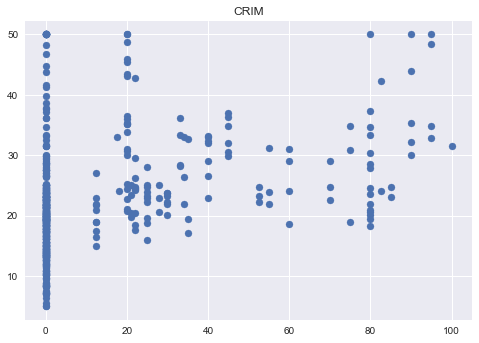

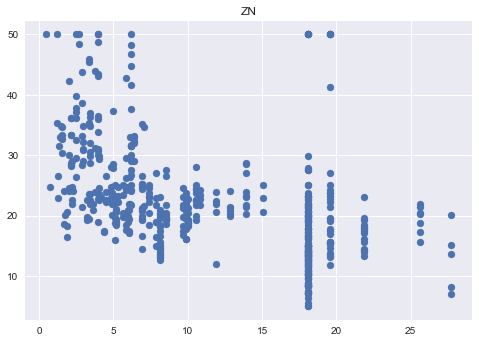

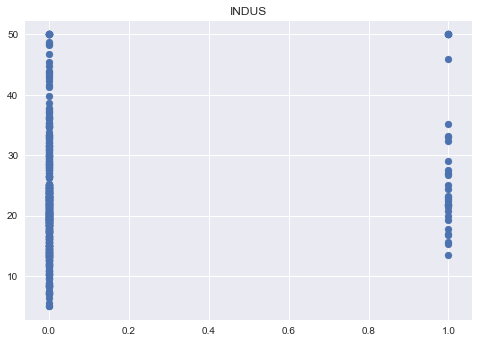

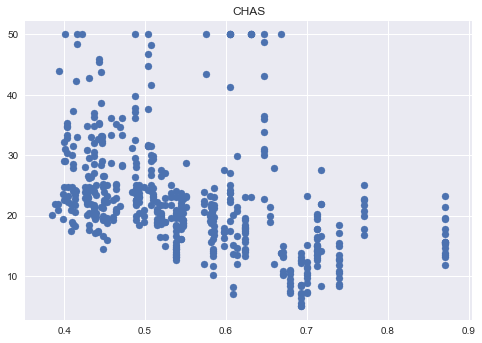

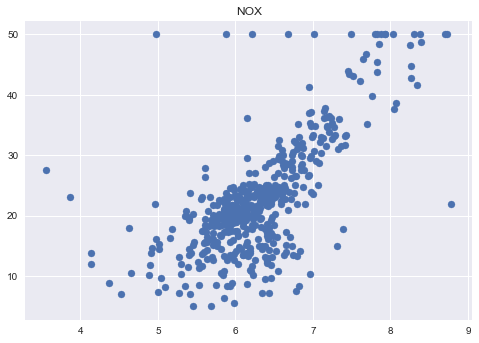

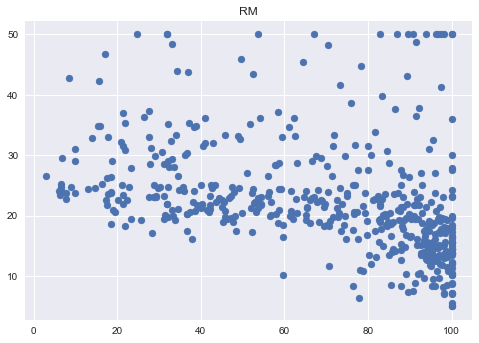

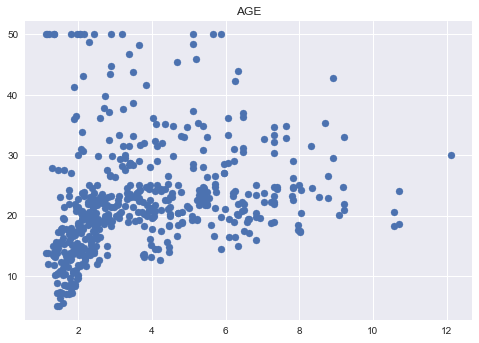

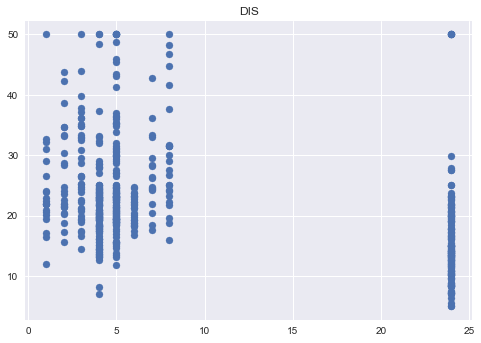

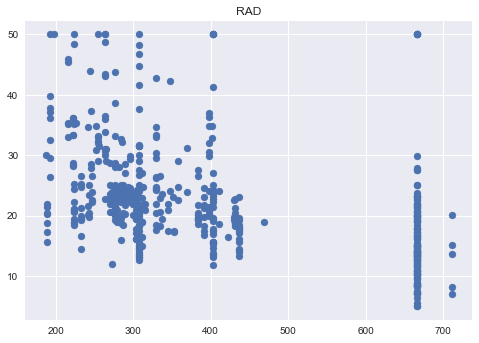

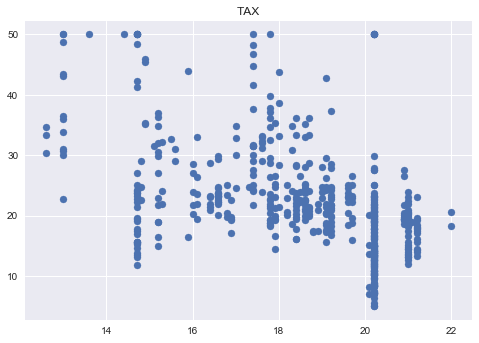

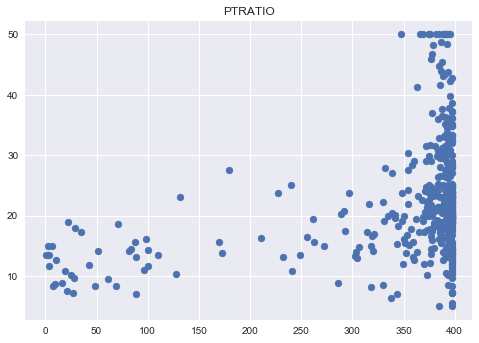

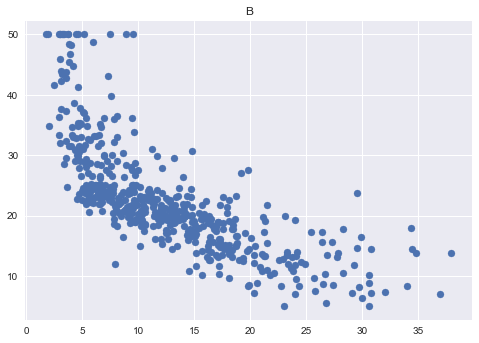

In [83]:
#Let's examine first examine each of the variables to see what the distribution looks like
for i in df.columns:
    plt.scatter(df[i], y)
    plt.show()
    plt.title(i)

#### Fitting Our First Model

Before we conduct any feature engineering, let's fit a model to our data set so that we have a benchmark score to see how our model performs. Then as we iterate through our models, we can see what's causing improvement.

First we'll split our data into training and test sets

In [84]:
msk = np.random.rand(len(df)) < 0.8
x_train = df[msk]
y_train = y[msk]
x_test = df[~msk]
y_test = y[~msk]

#### Let's first create our model object

In [85]:
regr_1 = linear_model.LinearRegression()

#### Then we fit this object with our training data

In [86]:
#Fit our regression using the training data
regr_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Now we can make predictions based on our trained model

In [87]:
regr_1_pred = regr_1.predict(x_test)

#### Now let's examine our Mean Squared Error (MSE): 

In [88]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr_1_pred))

print("How much error is that really?")

Mean squared error: 26.77
How much error is that really?


#### And our R^2...

In [89]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_1_pred))
print('This actually a pretty decent R^2 score')

Variance score: 0.77
This actually a pretty decent R^2 score


In [90]:
# The coefficients
for i, j in zip(regr_1.coef_, x_train.columns):
    print(j, i)

CRIM -0.100311175961
ZN 0.0488817584572
INDUS -0.0177329501321
CHAS 2.72508696697
NOX -18.6917580355
RM 3.64288472416
AGE 0.00493852151514
DIS -1.46604236912
RAD 0.323934086918
TAX -0.0143012036959
PTRATIO -0.875639216914
B 0.00841570572309
LSTAT -0.483225709022


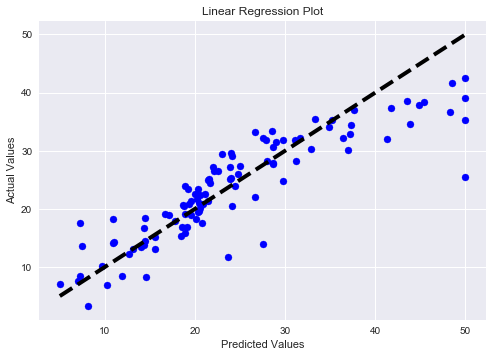

In [91]:
# Plot outputs
plt.scatter(y_test, regr_1_pred,  color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression Plot')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

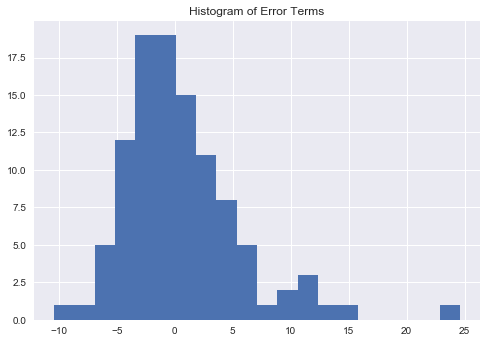

In [92]:
residuals = y_test - regr_1_pred
plt.hist(residuals, bins = 20)
plt.title('Histogram of Error Terms')
plt.show()

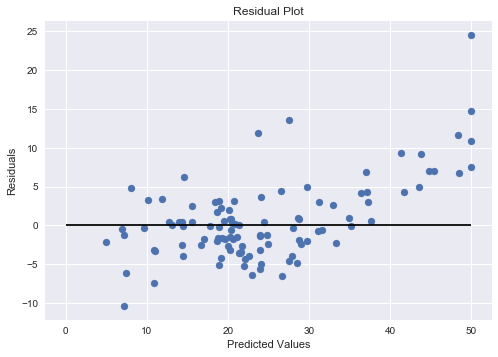

In [93]:
plt.scatter(y_test, y_test - regr_1_pred)
plt.hlines(y = 0, xmin = max(y_test), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

#### Variable Transformation (Feature Engineering)

Often when we run a linear regression, we see variables that have uneven distributions. 
One way to fix this problem is to transform the variables. Common transformations include 
squaring the variables, taking the square root, or most commonly - taking the log. We'll
take the log here and see if we get any improvement in our variable distributions.

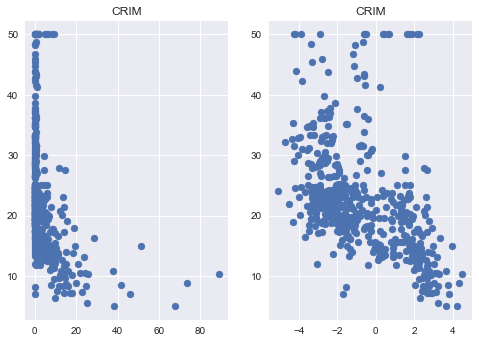

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


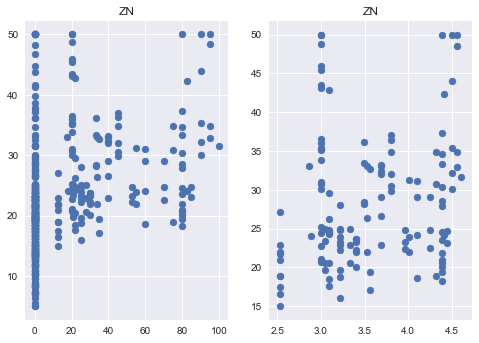

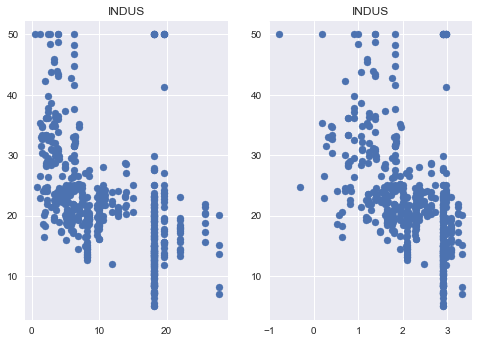

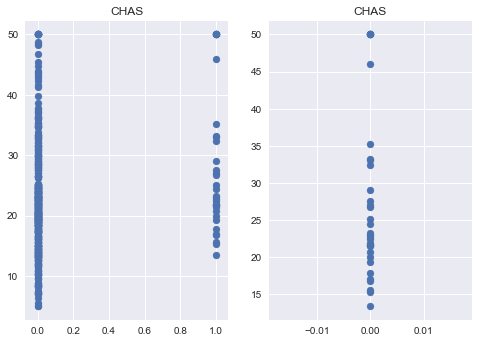

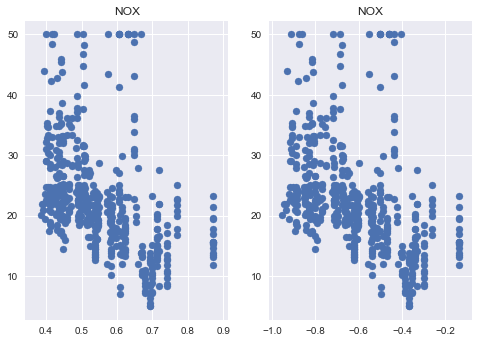

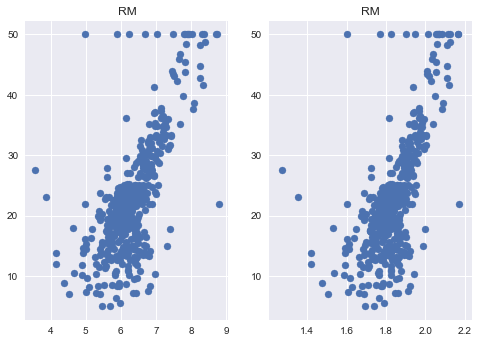

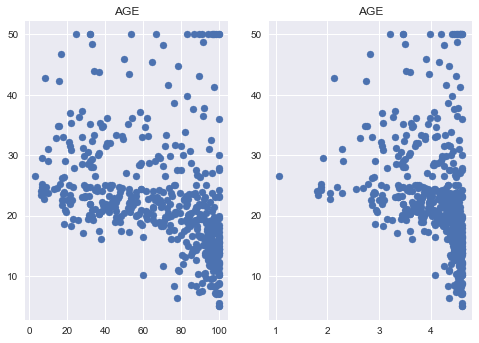

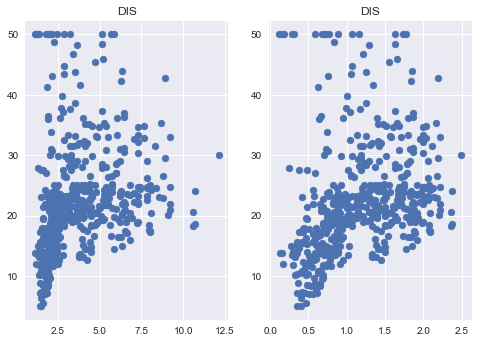

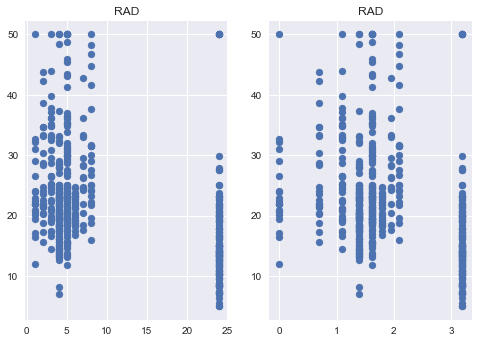

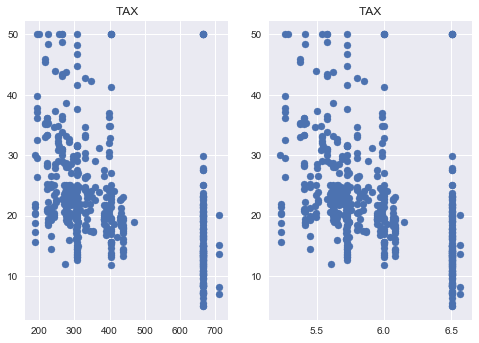

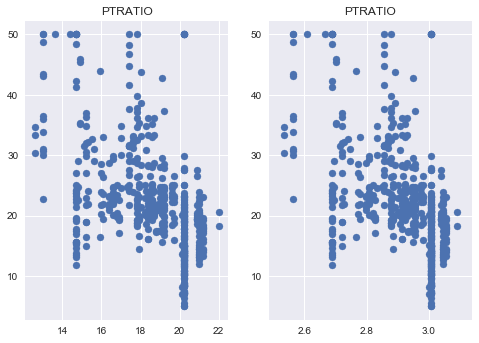

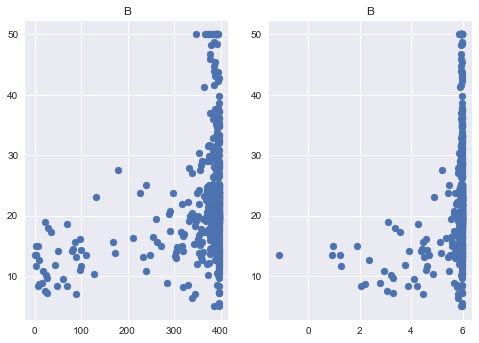

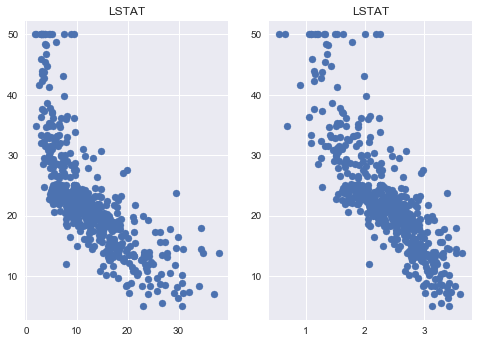

In [94]:
#The parameters for subplot are: number of rows, number of columns, and which subplot you're currently on. 
#So 1, 2, 1 means "a 1-row, 2-column figure: go to the first subplot." Then 1, 2, 2 means "a 1-row, 
#2-column figure: go to the second subplot.
import matplotlib.pyplot as plt

for i in df.columns:
    try:
        a = df[i]
        b = np.log(df[i])
        plt.subplot(1, 2, 1)
        plt.scatter(a, y)
        plt.title(i)
        plt.subplot(1, 2, 2)
        plt.scatter(b, y)
        plt.title(i)
        plt.show()
    except:
        pass

In [95]:
#### Applying the log transformation to CRIM, ZN, DIS, RAD, LSTAT
#Now let's apply the log transform to the following columns:
log_transform = ['CRIM', 'DIS', 'RAD', 'LSTAT']
for i in log_transform:
    df[i] = np.log(df[i])

#### Multi-Collinearity

Now that we've transformed a subset of the variables using the log transform, let's take a look at 
another one of our main assumptions - **multi-collinearity**. We'll do this first by examining a 
correlation matrix to see where multi-collinearity exits.

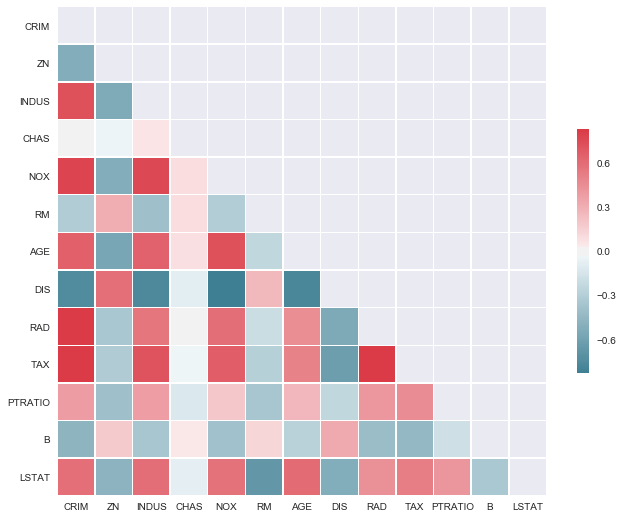

In [96]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show(1)

We see here that "CRIM" is appears to be highly correlated with a number of variables, as does 
"INDUS" and "NOX". Let's take a look at the **Variance Inflation Factors (VIFs)** to see which of these
variables we should eliminate.

In [97]:
df = df.fillna(0)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df.as_matrix(), i) for i in range(df.shape[1])]

Now let's see what our **VIF scores** are:

In [99]:
for j, k in zip(df.columns, vif):
    print(j, ":   ", k)

CRIM :    7.84792326424
ZN :    2.60859711326
INDUS :    14.3827957338
CHAS :    1.15483606333
NOX :    83.9613127099
RM :    88.8612116493
AGE :    23.5103428668
DIS :    25.4273213691
RAD :    30.6284906967
TAX :    44.9479757621
PTRATIO :    99.4788500665
B :    20.359837877
LSTAT :    44.9352885083


**Whoa, that's a lot of high scores!** A commonly accepted standard is to remove all variables with 
a **VIF > 5**. We obviously can't do that here, so we'll remove the three largest VIF-variables only.

In [100]:
df.drop(['PTRATIO', 'RM', 'NOX'], axis=1, inplace=True)

If you'd like, you can now re-run the VIF factors and see how we did! This aspect of the 
regression-model fitting process is an art, not just a science. We could spend a fair amount of 
time droppping/adding back variables to find the worst offenders, but for today we'll leave 
as an exercise to the reader :) 

#### Fitting Our Second Model

Thus far we've checked for missingness in our data set, examined our data set for linear relationships with the 
dependant variables and removed the variables most responsible for multi-collinearity. 

**I think it's time to fit our first model!**

Get a random 80% of the entire set

In [101]:
msk = np.random.rand(len(df)) < 0.8
x_train = df[msk]
y_train = y[msk]
x_test = df[~msk]
y_test = y[~msk]

Create linear regression object from **'sklearn'**

In [102]:
regr_2 = linear_model.LinearRegression()

In [103]:
#Fit our regression using the training data
regr_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
regr_2_pred = regr_2.predict(x_test)

#### Mean Squared Error Rate: 

In [105]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr_2_pred))

print("How much error is that really?")

Mean squared error: 17.99
How much error is that really?


In [106]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_2_pred))
print('This actually a pretty decent R^2 score')

Variance score: 0.80
This actually a pretty decent R^2 score


In [107]:
# The coefficients
for i, j in zip(regr_2.coef_, x_train.columns):
    print(j, i)

CRIM -0.163545514924
ZN 0.033835248257
INDUS -0.140600982252
CHAS 2.77831386004
AGE 0.0230878433833
DIS -5.68601597824
RAD 1.82787972076
TAX -0.0148467345029
B 0.00613351400148
LSTAT -12.4236777325


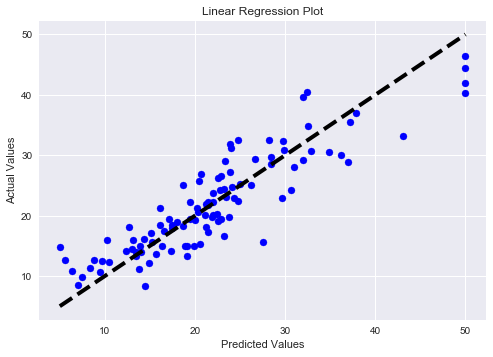

In [108]:
# Plot outputs
plt.scatter(y_test, regr_2_pred,  color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression Plot')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

#### So far not a bad looking regression line!

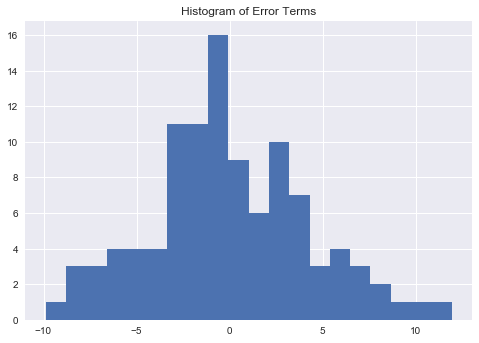

In [109]:
residuals = y_test - regr_2_pred
plt.hist(residuals, bins = 20)
plt.title('Histogram of Error Terms')
plt.show()

#### Now let's look at a plot of the residuals

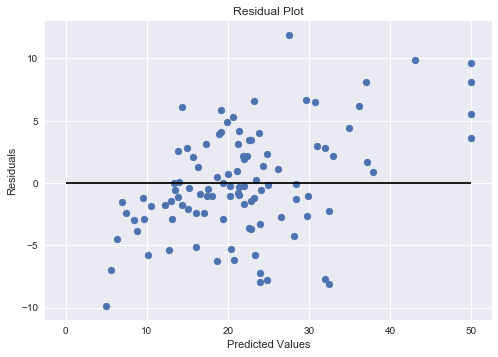

In [110]:
plt.scatter(y_test, y_test - regr_2_pred)
plt.hlines(y = 0, xmin = max(y_test), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

#### I have to say, our residuals look rather evenly dispersed about the graph!

This means we can check off the necessary assumptions of **constant variance** and **independance** of the **residuals**

#### Fitting Our Third Model

Sklearn is a very standard and straightforward tool for fitting models. Unfortunately, we can't derive some of the statistics we've come to expect in order to better tune our models without some linear algebra and adjusting the class. This is where the 
**'statsmodels'** package comes in handy. It's like an R-implementation of Linear Regression for Python, and if you've ever done regression in R, you'll know it's the best!

In [111]:
import statsmodels.formula.api as smf


df_train = x_train
df_test = x_test
df_train['target'] = y_train
df_test['target'] = y_test
print("Columns: ", df_train.columns, '\n')
print("Dataframe Shape: ", df_train.shape, '\n')
print(df_train.head())

Columns:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT',
       'target'],
      dtype='object') 

Dataframe Shape:  (402, 11) 

       CRIM    ZN  INDUS  CHAS   AGE       DIS       RAD    TAX       B  \
1 -3.600502   0.0   7.07   0.0  78.9  1.602836  0.693147  242.0  396.90   
2 -3.601235   0.0   7.07   0.0  61.1  1.602836  0.693147  242.0  392.83   
3 -3.430523   0.0   2.18   0.0  45.8  1.802073  1.098612  222.0  394.63   
5 -3.511570   0.0   2.18   0.0  58.7  1.802073  1.098612  222.0  394.12   
7 -1.934130  12.5   7.87   0.0  96.1  1.783475  1.609438  311.0  396.90   

      LSTAT  target  
1  2.212660    21.6  
2  1.393766    34.7  
3  1.078410    33.4  
5  1.650580    28.7  
7  2.952303    27.1  


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [112]:
import statsmodels.formula.api as smf

regr_3 = smf.ols(formula='target ~ ZN + INDUS + CHAS + AGE + DIS + RAD + TAX + B + LSTAT', data=df_train).fit()

In [113]:
print(regr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     114.0
Date:                Tue, 17 Oct 2017   Prob (F-statistic):          1.04e-103
Time:                        10:19:02   Log-Likelihood:                -1200.5
No. Observations:                 402   AIC:                             2421.
Df Residuals:                     392   BIC:                             2461.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.0035      2.608     22.627      0.0

As we look at this very nice output summary of our model, we notice a high p-value associated with the **"CRIM"** variable.
Let's delete this variable and re-run our model

In [114]:
predictions = regr_3.predict(df_test)

#### How has our MSE moved?

In [115]:
mean_squared_error(predictions, y_test)

18.068991572406411

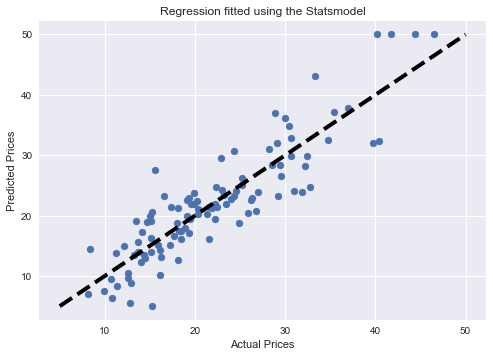

In [116]:
plt.scatter(predictions, df_test['target'])
plt.plot([df_test['target'].min(), df_test['target'].max()], [df_test['target'].min(), df_test['target'].max()], 'k--', lw=4)
plt.title('Regression fitted using the Statsmodel')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.show()

#### Now let's take a look at the error terms to check their distribution 

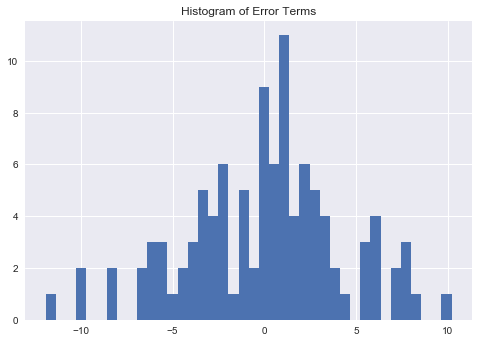

In [117]:
residuals = predictions - df_test['target']
plt.hist(residuals, bins = 40)
plt.title('Histogram of Error Terms')
plt.show()

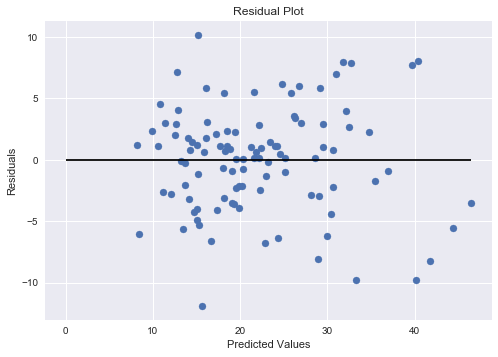

In [118]:
plt.scatter(predictions, predictions - df_test['target'])
plt.hlines(y = 0, xmin = max(predictions), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

### Finish checking model assumptions

#### 3. The residuals look fairly normaly distributed
#### 4. The variance of the residuals around the regression line looks close to constant
#### 5. Both 3 & 4 would lead us to conclude that these residuals are independant of each other 

Personally, after looking at this model I would go back to my regression and remove the variables with high p-values and
re-test my model. I would continue to examine the AIC/BIC scores to see how low I can get, and if I can address the extreme 
outliers in my residual plot. 

With this introduction, you're now ready to begin building regressions of your own!

In [121]:
influence = regr_3.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

<Container object of 3 artists>

#### Cook's Distance

Another graph useful for interpretting the output of a regression model is **Cook's Distance**. Cook's Distance helps us to highlight potentially influential points in our regression (those that could be heavily influencing the regression). In our example below, we would probably want to look at points #175 and #300 as being potetial outliers worth examining.

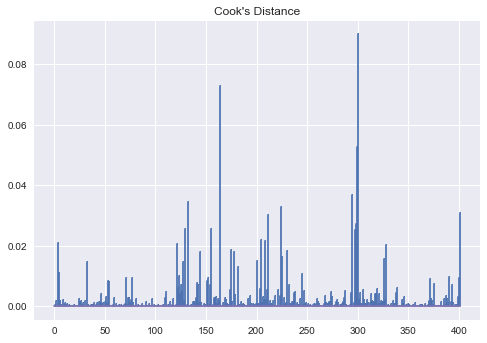

In [120]:
plt.title("Cook's Distance")
plt.show()